# Credit Card Fraud Detection

The dataset contains transactions made by credit cards in September 2013 by European cardholders. <br>
And presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced. <br>

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the providers cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. <br>

Link to the dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [83]:
from ISLP import confusion_table 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA) 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
# Importing the dataset 
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis before predictions

In [87]:
dataset.shape

(284807, 31)

In [88]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No <i>na</i> values present in the dataset, no need for extensive cleaning of replacements

In [89]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [90]:
494/(284315+492)

0.0017345079299314974

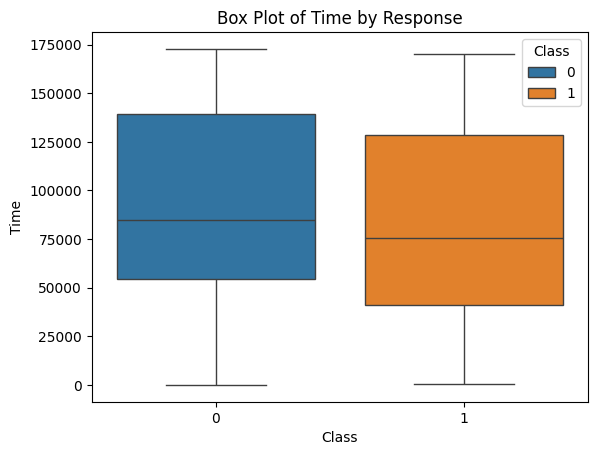

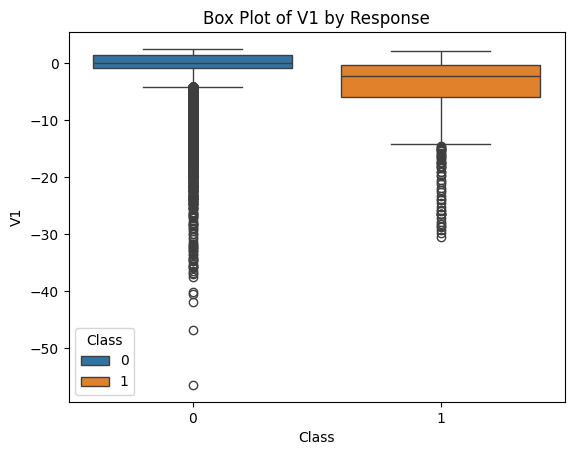

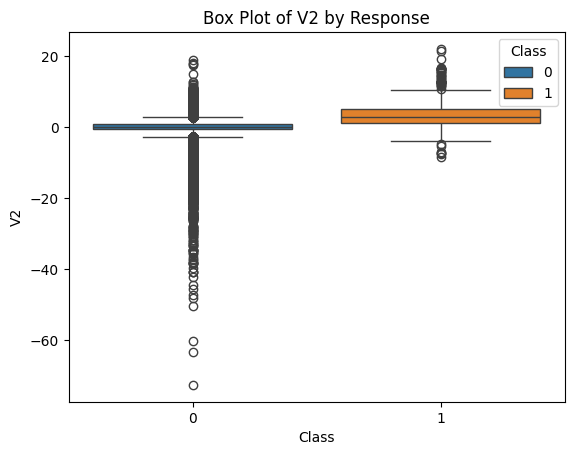

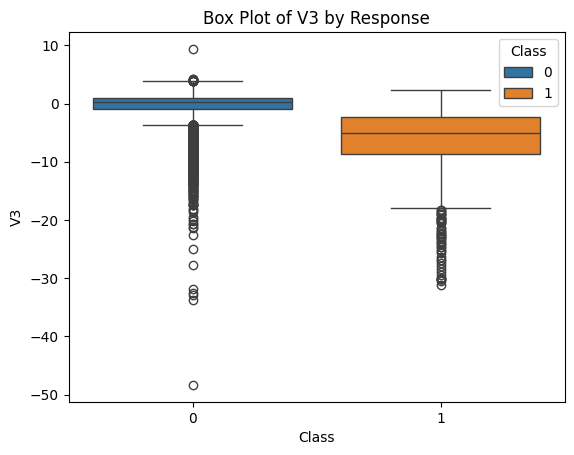

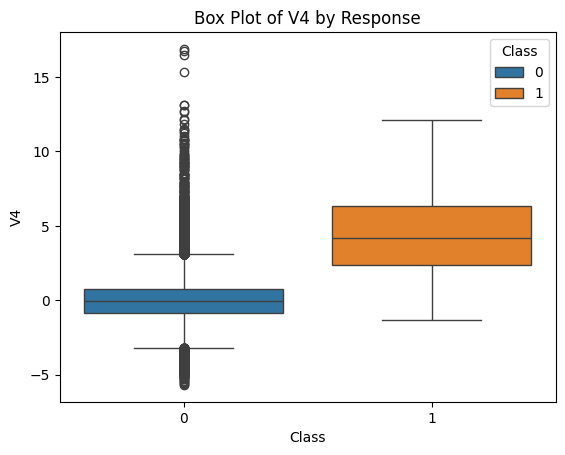

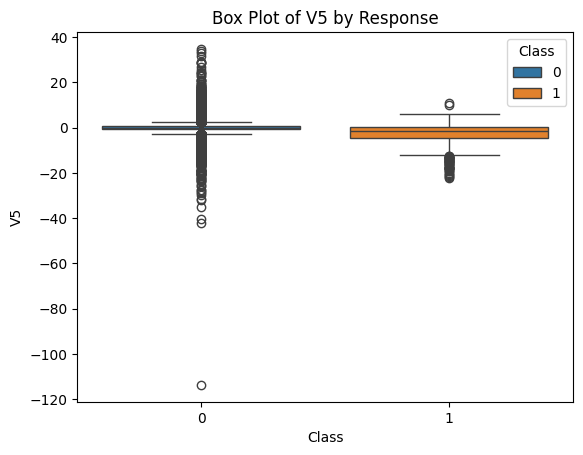

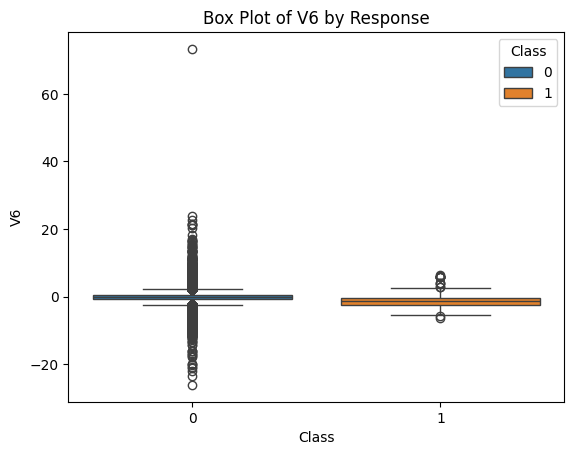

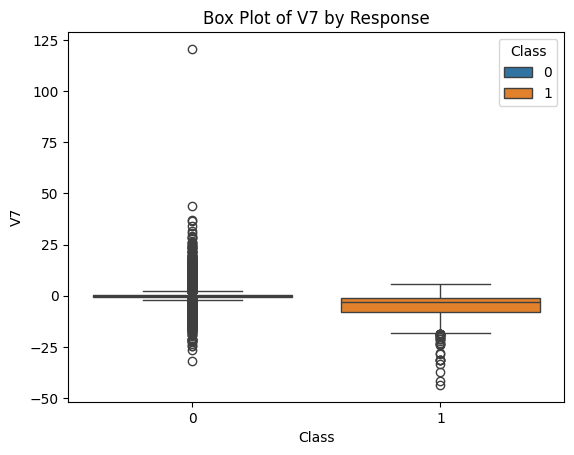

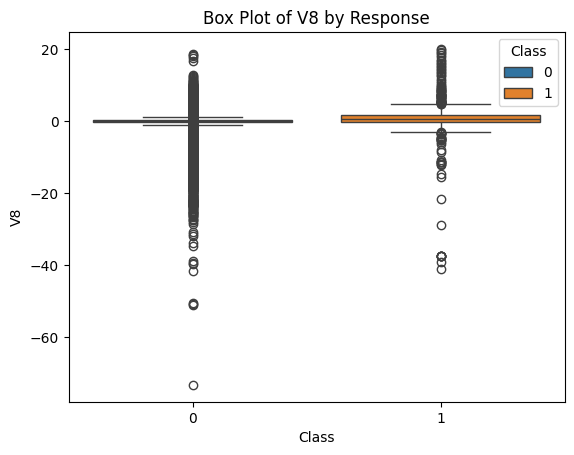

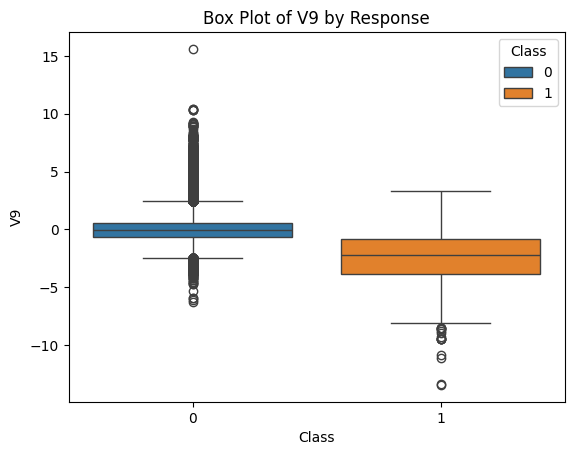

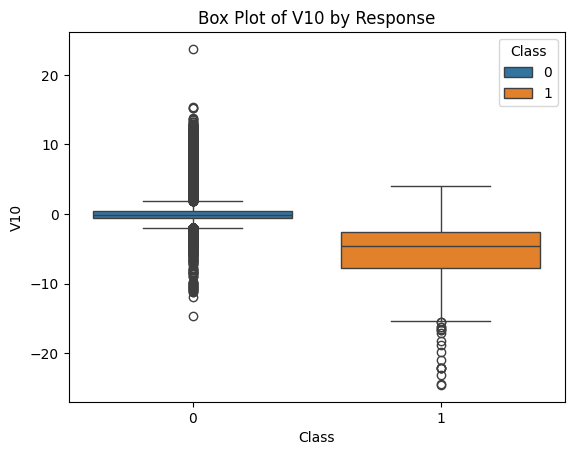

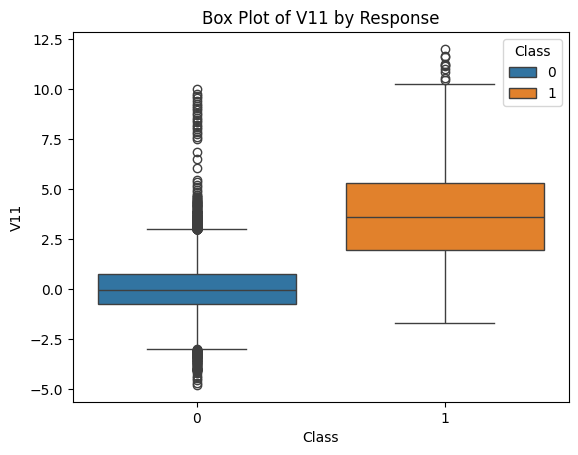

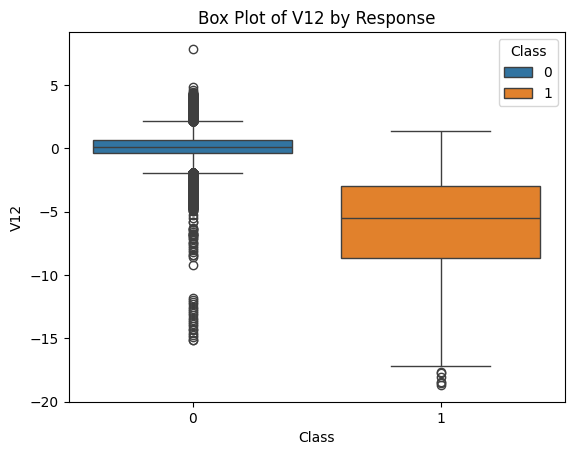

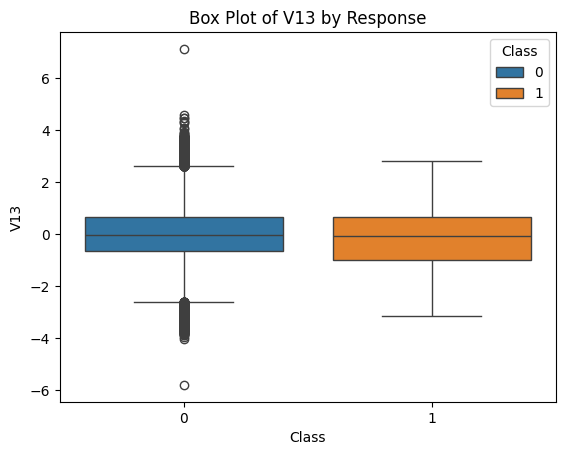

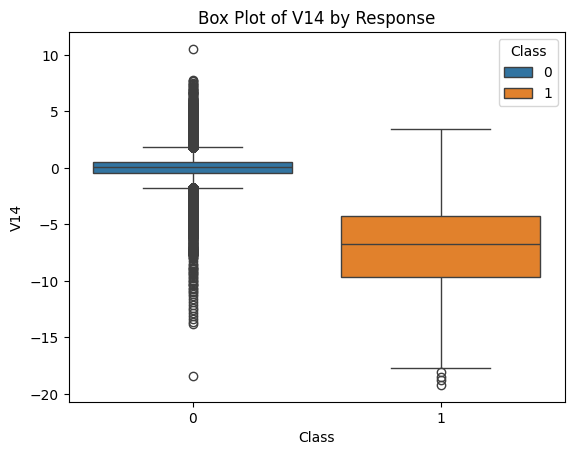

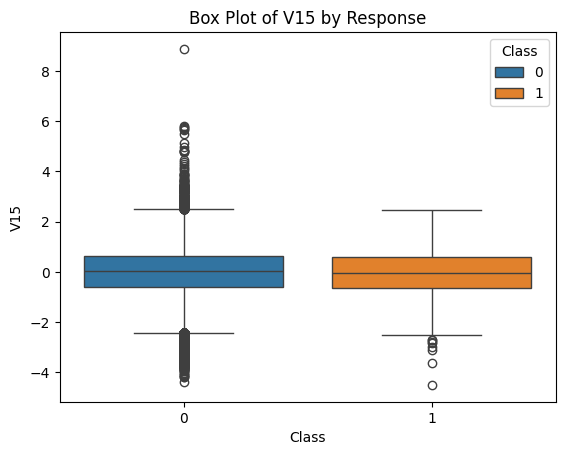

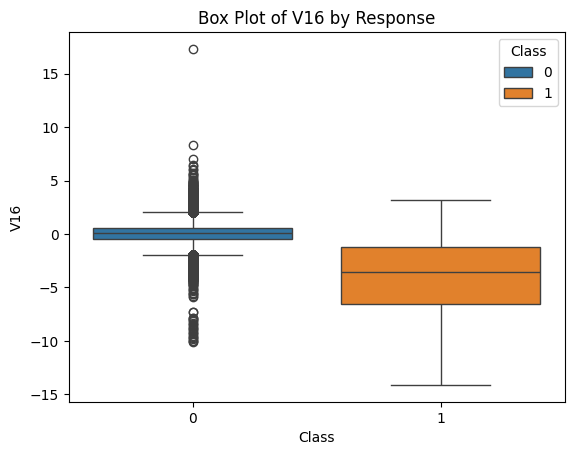

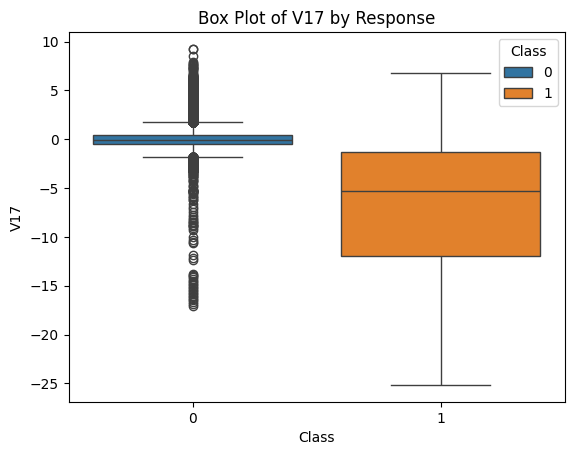

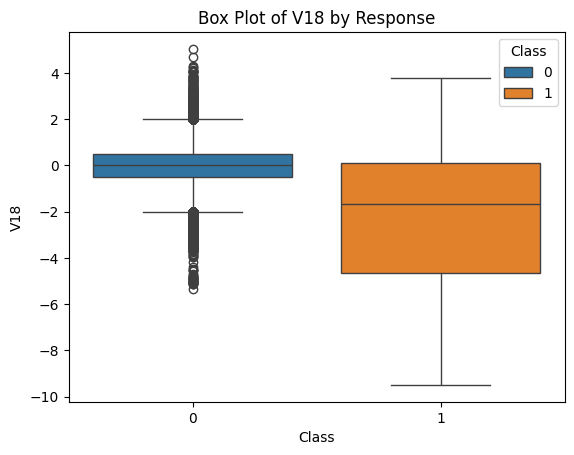

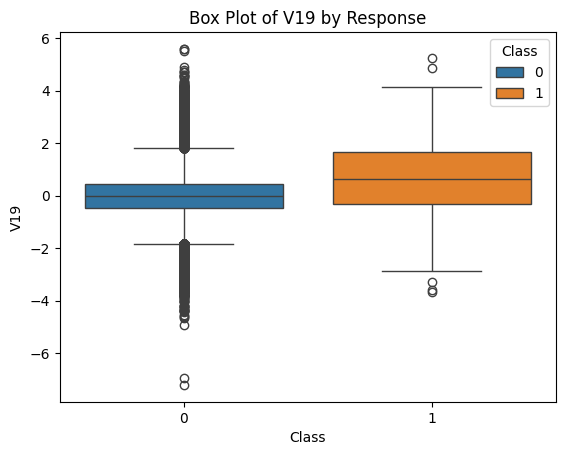

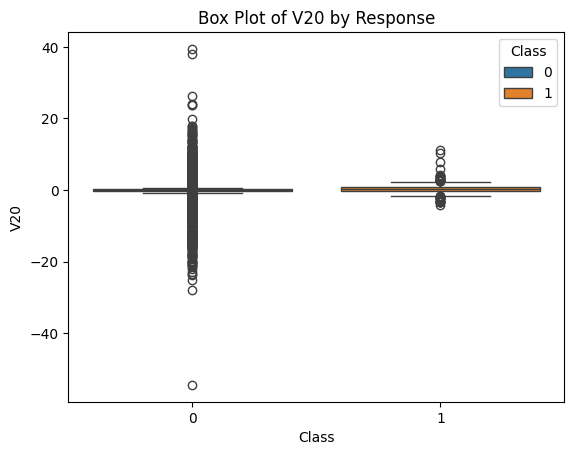

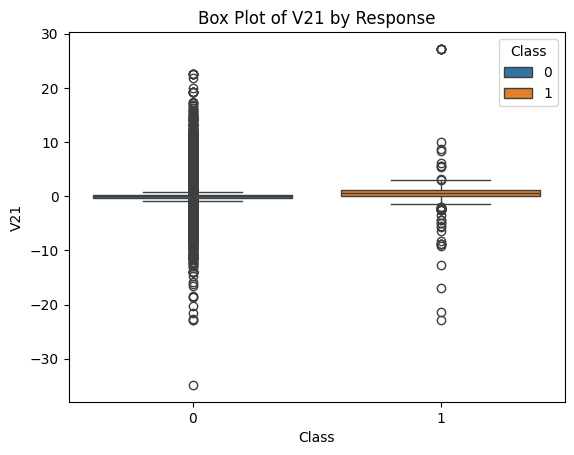

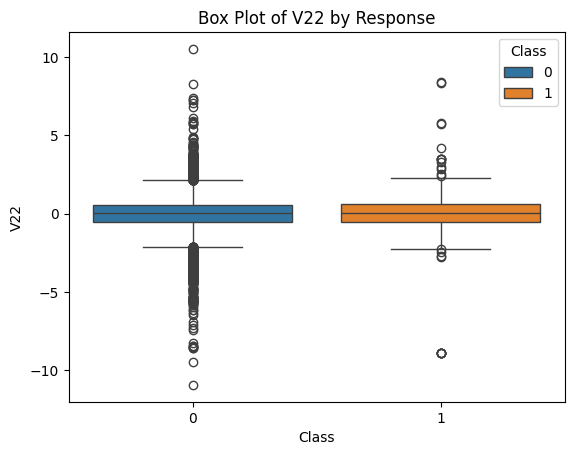

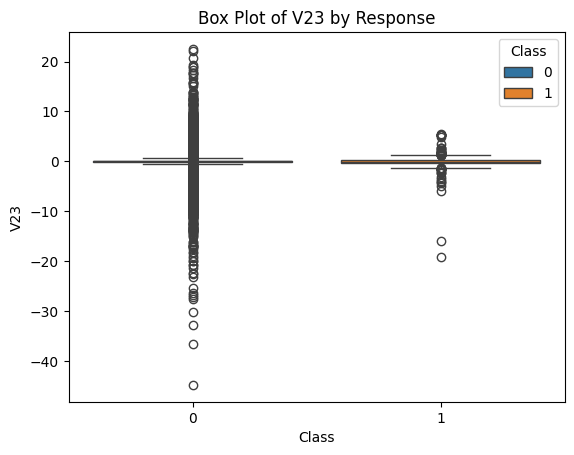

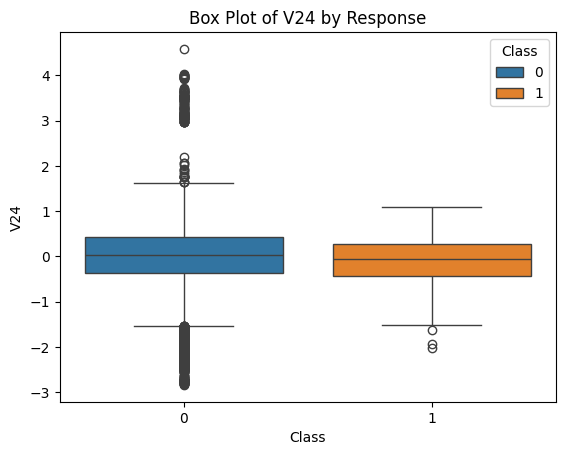

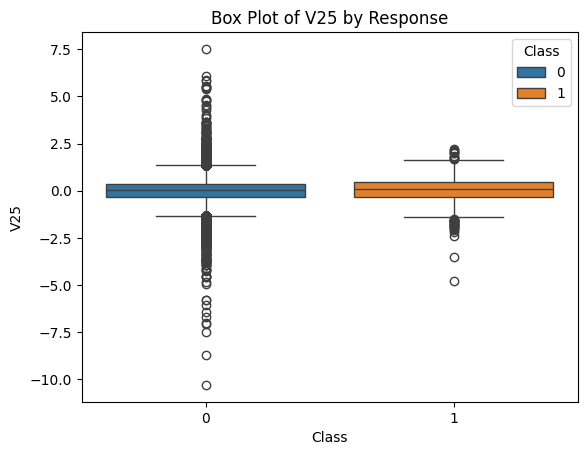

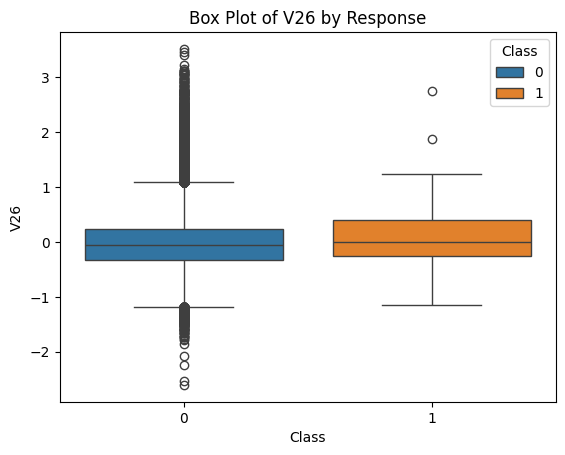

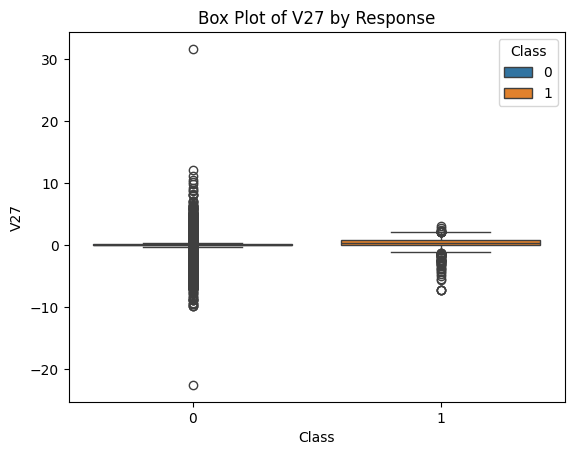

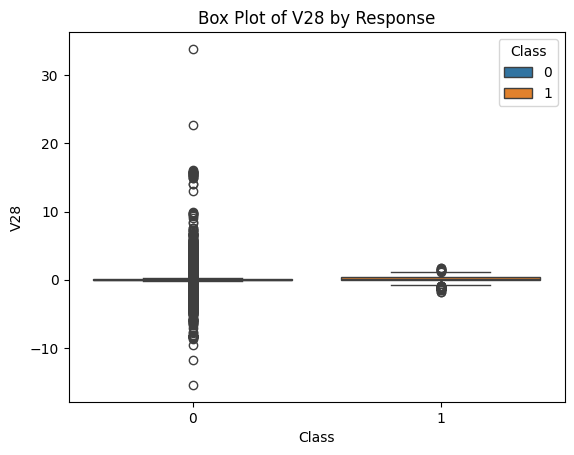

In [91]:
for column in dataset.columns[:-2]:  # Exclude class and amount
    sns.boxplot(data=dataset, x='Class', y=column, hue='Class')
    plt.title(f'Box Plot of {column} by Response')
    plt.show()

<Axes: xlabel='Time', ylabel='Amount'>

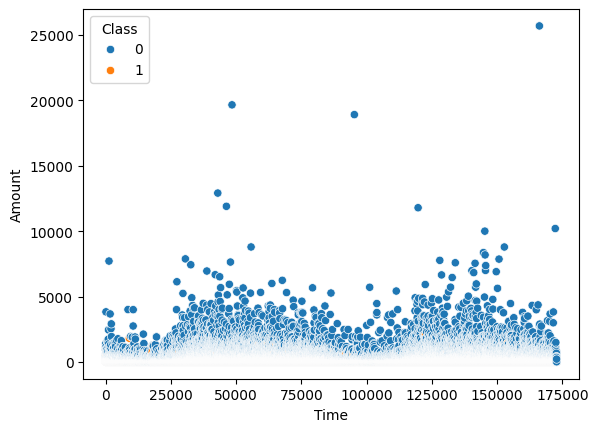

In [92]:
sns.scatterplot(data=dataset, x='Time', y='Amount', hue='Class')

In [93]:
np.mean(dataset[dataset['Class'] == 1]['Amount'])

122.21132113821139

The average Amount for a fradulant transaction is 122.2$, and usually fradualant transactions happens quickly 

In [94]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [95]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: xlabel='Amount'>

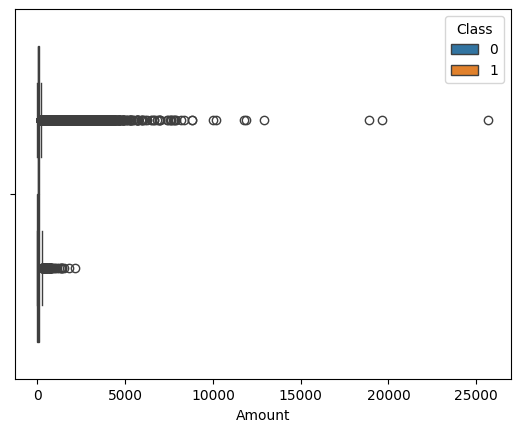

In [96]:
sns.boxplot(data=dataset, x='Amount', hue='Class')

### Predictions
But before applying any classification algorithms, because feature values are distributed differently scaling should be done.

In [97]:
X = dataset.drop(columns=['Time', 'Class'])

In [98]:
# Scaling 
scaler = StandardScaler(copy=True, with_mean=True, with_std=True) # Scaling with a standerd deviation of 1
scaler.fit(X)
X_scaled = scaler.transform(X)

In [99]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Turning into a DataFrame

In [100]:
X_scaled.std()

V1        1.000002
V2        1.000002
V3        1.000002
V4        1.000002
V5        1.000002
V6        1.000002
V7        1.000002
V8        1.000002
V9        1.000002
V10       1.000002
V11       1.000002
V12       1.000002
V13       1.000002
V14       1.000002
V15       1.000002
V16       1.000002
V17       1.000002
V18       1.000002
V19       1.000002
V20       1.000002
V21       1.000002
V22       1.000002
V23       1.000002
V24       1.000002
V25       1.000002
V26       1.000002
V27       1.000002
V28       1.000002
Amount    1.000002
dtype: float64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X_scaled), dataset['Class'], test_size=0.2, random_state=42) # Splitting 80/20

#### Logistic Regression

In [102]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [103]:
LR_predictions = LR.predict(X_test)

In [104]:
accuracy_score(LR_predictions, y_test)

0.9991222218320986

In [105]:
confusion_table(LR_predictions, y_test)

Truth,0,1
Predicted,,
0,56855,41
1,9,57


In [106]:
LR_report = classification_report(LR_predictions, y_test)
print(LR_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56896
           1       0.58      0.86      0.70        66

    accuracy                           1.00     56962
   macro avg       0.79      0.93      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Logistic Regression performes very well in the above scenario, but there are 41 false negatives  

#### Linear Discriminent Analysis

In [107]:
lda = LDA()
lda_pred = lda.fit(X_train, y_train).predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,56853,25
1,11,73


In [108]:
accuracy_score(lda_pred, y_test)

0.9993679997191109

In [109]:
lda_report = classification_report(lda_pred, y_test)
print(lda_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.74      0.87      0.80        84

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



#### Quadretic Discrimiment Analysis

In [122]:
qda = QDA()
qda_pred = qda.fit(X_train, y_train).predict(X_test)
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,55460,10
1,1404,88


In [111]:
accuracy_score(qda_pred, y_test)

0.9751764334117482

In [112]:
qda_report = classification_report(qda_pred, y_test)
print(qda_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     55470
           1       0.90      0.06      0.11      1492

    accuracy                           0.98     56962
   macro avg       0.94      0.53      0.55     56962
weighted avg       0.97      0.98      0.96     56962



In Quadretic Discriminent Analysis we start ot see some reduction in accuracy

#### K-Nearest Neigbours

In [115]:
# We will use a for loop to iterate through the tuning paremeter
report_dict = {}

for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    report_dict[n] = classification_report(knn_pred, y_test)
    print(f"Neighbours : {n}  Accuracy : {accuracy_score(knn_pred, y_test)}")

Neighbours : 1  Accuracy : 0.999403110845827
Neighbours : 2  Accuracy : 0.9994733330992591
Neighbours : 3  Accuracy : 0.9995962220427653
Neighbours : 4  Accuracy : 0.9995435553526912
Neighbours : 5  Accuracy : 0.9995611109160493
Neighbours : 6  Accuracy : 0.9995084442259752
Neighbours : 7  Accuracy : 0.9995084442259752
Neighbours : 8  Accuracy : 0.999403110845827
Neighbours : 9  Accuracy : 0.999420666409185
Neighbours : 10  Accuracy : 0.9993679997191109
Neighbours : 11  Accuracy : 0.9994382219725431
Neighbours : 12  Accuracy : 0.999420666409185
Neighbours : 13  Accuracy : 0.9994382219725431
Neighbours : 14  Accuracy : 0.999420666409185
Neighbours : 15  Accuracy : 0.999385555282469
Neighbours : 16  Accuracy : 0.999385555282469
Neighbours : 17  Accuracy : 0.999385555282469
Neighbours : 18  Accuracy : 0.999385555282469
Neighbours : 19  Accuracy : 0.9993679997191109
Neighbours : 20  Accuracy : 0.999385555282469


In [114]:
for key, value in report_dict.items():
    print(key, value)

1               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.80      0.85      0.82        92

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

2               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56888
           1       0.72      0.96      0.83        74

    accuracy                           1.00     56962
   macro avg       0.86      0.98      0.91     56962
weighted avg       1.00      1.00      1.00     56962

3               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56879
           1       0.81      0.95      0.87        83

    accuracy                           1.00     56962
   macro avg       0.90      0.98      0.94     56962
weighted avg       1.00      1.00      1.00     56962

4            

3 neighbour tuned model most accurate model with the least computational power

In [121]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_pred = knn.fit(X_train, y_train).predict(X_test)
print(accuracy_score(knn_pred, y_test))
confusion_table(knn_pred, y_test)

0.9995962220427653


Truth,0,1
Predicted,,
0,56860,19
1,4,79


## Conclusion 
<table>
    <caption>Table of Models vs. Accuracy</caption>
    <tr>
        <th>Model</th>
        <th>Overall Accuracy</th>
        <th>False Negatives*</th>
    </tr>
    <tr>
        <td>LogisticRegression</td>
        <td>0.99912</td>
        <td>41</td>
    </tr>
    <tr>
        <td>LDA</td>
        <td>0.99936</td>
        <td>25</td>
    </tr>
    <tr>
        <td>QDA</td>
        <td>0.97517</td>
        <td>10</td>
    </tr>
    <tr>
        <td>KNNs</td>
        <td>0.99959</td>
        <td>19</td>
    </tr>
</table><br> 
*In this case False Negatives are predicted Non-Fradulant Transactions but actually Fraudulent <br>
Quadretic Discriminet Analysis considarably redu
